# Introduction to Regression

### Data Science 410


## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the **best fit** to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). *Best fit* means that there is an optimal set of parameters which minimize an error criteria we choose.

Regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. **Single regression** has one label used to predict one feature. **Multiple regression** uses two of more feature variables to predict a label. 

Many machine learning models, including some of the latest deep learning methods, are a form of regression. **Linear regression** is the foundational form of regression. Linear regression minimizes squared error of the predictions of the dependent variable using the values of the independent variables. This approach is know as the **method of least squares**.

By developing an understanding of linear regression, you are building a foundation to understand many other machine learning models. Nearly all machine learning methods suffer from the same problems, including over-fitting and mathematically unstable fitting methods. Understanding these problems in the linear regression context will help you work with other machine learning models.  

## History

Regression is based on the method of least squares or the method of minimum mean square error. The idea of averaging errors have been applied for nearly three centuries. The fist known publication of a *method of averages* was by the German astronomer Tobias Mayer in 1750. Lapace used a similar method which he published in 1788.

<img src="img/TobiasMayer.jpg" alt="TobiasMayer" style="width: 200px;"/>

The first publication of the **method or least squares** was by the French mathematician Adrien-Marie Legendre in 1805. Legendre was a brilliant mathematician, known for his unpleasant personality.  

![](img/Legendre.jpg)
<center>Caricature of Legendre, published method of least squares</center>

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

![](img/Carl_Friedrich_Gauss.jpg)
<center>Carl Friedrich Gauss, early adopter of the least squares method</center>

The first use of the term **regression** was by Francis Gaulton, a cousin of Charles Darwin, in 1886. Gaulton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. Gaulton used the term **regression to the mean** to describe the natural processes he observed in inherited traits.  

<img src="img/Francis_Galton.jpg" alt="Drawing" style="width:225px; height:250px"/>
<center>Francis Galton, inventor of regression</center>

While Gaulton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models. 

## Introduction to Theory of Linear Regression

We will focus on the theory of **linear models**, which are foundational. Key properties of linear models include:
- Derived with linear algebra.
- Include any model **linear in coefficients**, including polynomials, splines, Gaussian kernels and many other nonlinear function.    
- Understanding linear models is basis for understanding behavior many other statistical or machine learning models.
- Basis of many time series models.



### Linear model of a strait line

Let's have a look at the simple case of a regression model for a straight line. For this example we will work with single regression with one feature and one label. The data are in the form of some number of values pairs, $\{x_i,y_i \}$. 

The goal of this regression model is to find a straight that best fits the observed data. We can define the line by two coefficients or **parameters**, the **slope** and the **intercept**. A general representation of this parameterization of a straight line is illustrated in the figure below.

<img src="img/ymxb.jpg" alt="y_equals_mx_plus_b" style="width: 450px;"/>
<center>**Single regression model**</center>

Where,  

\begin{align}
m &= slope = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y &= b\ at\ x = 0
\end{align}


For each of the pairs of observed values, ${x_i,y_i}$, we can write the equation for the line with the errors as:

\begin{align}
y_i &= mx_i + b + \epsilon_i \\
where \\
\epsilon_i &= error
\end{align}

We can visualize these errors as shown in the figure below.

<img src="img/LSRegression.jpg" alt="LSRegression" style="width: 450px;"/>
<center>Example of least squares regression with errors shown as vertical lines</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least squares regression** problem.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of computationally efficient algorithms for finding minimums of equations. 

## A First Regression Model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [107]:
import numpy as np
import numpy.random as nr
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 1

# Generate data columns
nr.seed(5666)
x_data = np.linspace(x_start, x_end, n_points) # The x values
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points) # The Normally distributed noise
y_data = np.linspace(y_start, y_end, n_points) + y_error # The y values

# Put data in dataframe
sim_data = pd.DataFrame({'x':x_data, 'y':y_data})
# Or alternatively:
# sim_data = pd.DataFrame(data=np.column_stack((x_data, y_data)), columns=['x','y'])

sim_data.head()

,x,y
0,0.000000,0.475868
1,0.204082,-0.084436
2,0.408163,1.216802
3,0.612245,0.362557
4,0.816327,2.521151


Next, you can visualize these data by executing the code in the cell below. Notice that the points nearly fall on a straight line.

Text(0.5, 1.0, 'x vs y')

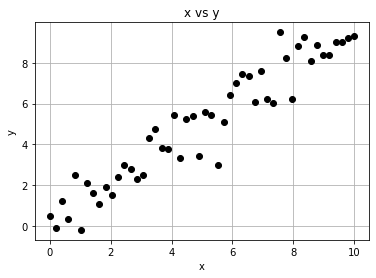

In [108]:
# Matplotlib may give some font errors when loading for the first time, you can ignore these
plt.plot(sim_data['x'], sim_data['y'], 'ko')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

Now, you are ready to build and evaluate a regression model using Python. Python has libraries that contain linear modeling capabilities.

The *Scikit-learn* package has many different types of machine learning algorithms. Here we will concern ourselves with the linear regression capabilities.

The second library is called 'Stats-models'.  For those that have experience with the programming language, R, this library is the most similar because it provides easy statistical analysis of linear models that are fitted to the data.

To start, we will show how to use the library 'Scikit-learn' for linear regression. Model creation in Scikit-learn generally has two steps, declaring the model formulation and then fitting the model

In our case we only have one independent variable and one dependent variable. The code in the cell below does the following:  

- Compute the Python model object, `linear_model`, using the simple linear regression.
- Use the model object to compute scores (predicted values) for the dependent variable `y`. In this case, we just use the data that was originally used to compute the model. In a more general case, you can use other data to make predictions from the model.
- The residuals of the model are computed.

Execute this code and examine the head of the data frame computed.

Now we show how to fit a line with Stats Models package. The model declaration and fitting are in a different format as shown below.

In [109]:
## Define the regresson model and fit it to the data
#nr.seed(3344)
ols_model = sm.ols(formula = 'y ~ x', data=sim_data).fit()

## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (ols_model._results.params[0], ols_model._results.params[1]))

Intercept = 0.306  Slope = 0.941


In [110]:
# Add predicted to pandas dataframe
sim_data['predicted'] = ols_model.predict(sim_data.x)
# Add residuals to pandas dataframe
sim_data['resids'] = np.subtract(sim_data.predicted, sim_data.y)

# View head of data frame
sim_data.head(10)

,x,y,predicted,resids
0,0.000000,0.475868,0.305594,-0.170274
1,0.204082,-0.084436,0.497657,0.582093
2,0.408163,1.216802,0.689720,-0.527082
3,0.612245,0.362557,0.881783,0.519226
4,0.816327,2.521151,1.073846,-1.447306
5,1.020408,-0.181119,1.265908,1.447027
6,1.224490,2.096915,1.457971,-0.638943
7,1.428571,1.631663,1.650034,0.018371
8,1.632653,1.074532,1.842097,0.767565
9,1.836735,1.897740,2.034160,0.136420


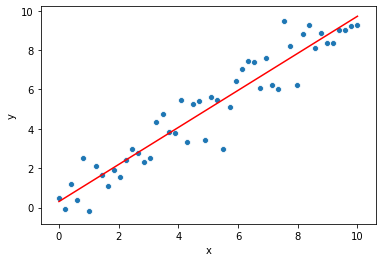

In [111]:
sns.lineplot(x='x', y='predicted', data=sim_data, color='red')
sns.scatterplot(x='x', y='y', data=sim_data)

The code in the cell below is fairly volumonous, but straight forward. In summary, the code computes summary statistics and makes diagnostic plots for ordinary linear models.

The Scikit-learn library is primarily made for fitting models and getting predictions. For linear regression, we are also interested in many diagnostic plots.  To get these plots easily, we can use a different library called statsmodels.

### Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

<img src="img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coeficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model with perfectly explain the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_SSR = SSR\ degrees\ of\ fredom\\
df_SST = SST\ degrees\ of\ fredom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coeficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

**Your Turn:** Examine the performance metrics for the previous two regressions. How do SSE, SSR, SST, $R^2$, and RMSE compare?

In [112]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     469.5
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.97e-26
Time:                        19:02:53   Log-Likelihood:                -64.907
No. Observations:                  50   AIC:                             133.8
Df Residuals:                      48   BIC:                             137.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3056      0.252      1.212      0.231      -0.201       0.812
x              0.9411      0.043     21.668      0.000       0.854       1.028
==============================================================================
Omnibus:                        0.850   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.450
Skew:                          -0.228   Prob(JB):                        0.799
Kurtosis:                       3.091   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
## Print RMSE
RMSE = np.std(sim_data.resids)
print('RMSE = %4.3f' % (RMSE))

RMSE = 0.886


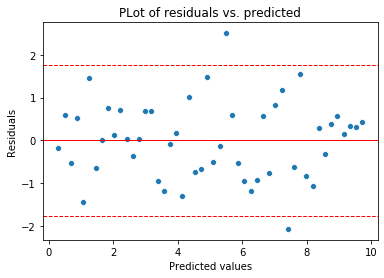

In [145]:
def residual_plot(df):
    RMSE = np.std(sim_data.resids)
    sns.scatterplot(x='predicted', y='resids', data=sim_data)
    plt.axhline(0.0, color='red', linewidth=1.0)
    plt.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.title('PLot of residuals vs. predicted')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    
residual_plot(sim_data)    

In [58]:
import statsmodels.formula.api as sm
import seaborn as sns

ols_model = sm.ols(formula = 'y ~ x', data=sim_data)
# Alternatively:
#ols_model = sm.OLS(y_output, sm.add_constant(x_input))

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([1,1]))

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Intercept, Slope : Intercept    0.472582
x            0.947984
dtype: float64
Intercept t-value, Slope t-value: Intercept     1.848916
x            21.522124
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4726      0.256      1.849      0.071      -0.041       0.986
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.4206      0.219      6.493      0.000       0.981       1.860

SSE, SST, SSR, and RMSE:


NameError: name 'y_output' is not defined

**Your Turn:** Create a regression moodel from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with a the error having a standard deviation of 5. Plot the result of your model. How does this slope and intercept of this model compare to the model from the data with a standard deviation of 1? **Hint:** You need need to add columns named `score` and `resids` to the data frame before you create the plots. 

In [59]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
reg_data_5 = pd.DataFrame({'x':x_data, 'y':y_data})

reg_data_5.head()

,x,y
0,0.000000,-2.119895
1,0.204082,1.171974
2,0.408163,-4.757100
3,0.612245,-0.341797
4,0.816327,-1.857624


Intercept, Slope : Intercept   -0.468371
x            1.336158
dtype: float64
Intercept t-value, Slope t-value: Intercept   -0.381263
x            6.311547
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Slope:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.4684      1.228     -0.381      0.705      -2.938       2.002
Intercept:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8678      1.052      0.825      0.413      -1.247       2.982

SSE, SST, SSR, and RMSE:
SSE: 774.2449689021739
SST: 1707.1727908168316
SSR: 932.9278219146577
RMSE: 27.82

Text(0.5, 1.0, 'x vs y')

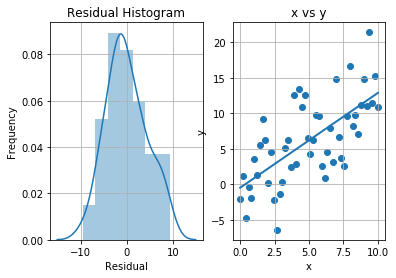

In [60]:
# Fit the model and get the linear model summaries/plots.
x5_input = reg_data_5['x']
y5_output = reg_data_5['y']
ols5_model = sm.ols(formula='y ~ x', data = reg_data_5)

results5 = ols5_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results5.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results5.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results5.t_test([1,0]))
print('Intercept:')
print(results5.t_test([1,1]))

print('\nSSE, SST, SSR, and RMSE:')
mean5_y = np.mean(y5_output)
sst5 = np.sum((y5_output - mean5_y)**2)
sse5 = sst5 - results5.ssr
print('SSE: {}'.format(sse5))
print('SST: {}'.format(sst5))
print('SSR: {}'.format(results5.ssr))
print('RMSE: {}'.format(np.sqrt(results5.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5.summary())

# Plot a histogram of the residuals
y5_pred = ols5_model.fit().predict(x5_input)

plt.subplot(1, 2, 1)
sns.distplot(results5.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.subplot(1, 2, 2)
plt.scatter(x5_input, y5_output)
plt.plot(x5_input, y5_pred, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

### Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

<img src="img/Errors.jpg" alt="Regression_Errors" style="width: 450px;"/>

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coeficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model with perfectly explain the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_SSR = SSR\ degrees\ of\ fredom\\
df_SST = SST\ degrees\ of\ fredom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coeficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

**Your Turn:** Examine the performance metrics for the previous two regressions. How do SSE, SSR, SST, $R^2$, and RMSE compare?

## Scaling Data

When performing regression with numeric variables you will almost **always scale the data**.  Scaling data is important not just for regression, but most other machine learning models. Some reasons to scale regression data include:

- The intercept may be a long way from the actual data. With scaled features, the intercept is at the centroid of the distribution. 
- Scaling prevents features with a large numerical range from overwhelming featuures with small numerical values. Numerical range is not an indicator of feature importance!

There are several possibile approaches to scaling data:
 - Scale the features or independent variables. This is the most common practice.
 - Scale the label or dependent variable.
 - Scale both, which is another common practice
 
In this case, we will just scale the one feature. Execute the code in the cell below and examine the results. 

In [ ]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# Add scaled x to data frame
sim_data['x_scale'] = scale(sim_data['x'])

sim_data.head()

Notice that the new `x_scale` feature has some additional attributes. These attributes are used to scale new data on which you are making predicitons. This model **will not work on unscaled** data. 

Run the code in the cell below to create and evaluate a regression model using the scaled data. 

In [ ]:
x_scaled = sim_data['x_scale']
ols_model = sm.ols(formula='y ~ x_scale', data = sim_data)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Scaled: Intercept, Slope : {}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Scaled: Intercept t-value, Slope t-value: {}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results.t_test([1,0]))
print('Intercept:')
print(results.t_test([1,1]))

print('\nScaled: SSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Scaled Residual Histogram')

Examine these results and compare them to the results for the unscaled regression. Which performance statistics are the same and which are different?

# Your Turn:

In the cell below use the data you created earlier to compute and evaluate a regression model using a scaled feature. Which performance metrics are the same and which are different.

In [ ]:
# Get scaled x
scaled_x5_input = scale(x5_input)
reg_data_5['x_scaled'] = scaled_x5_input

# Fit the model and get the linear model summaries/plots.
ols5_model_scaled = sm.ols(formula='y ~ x_scaled', data = reg_data_5)

results5_scaled = ols5_model_scaled.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slope : {}'.format(results5_scaled.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-value: {}'.format(results5_scaled.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print('Slope:')
print(results5_scaled.t_test([1,0]))
print('Intercept:')
print(results5_scaled.t_test([1,1]))

print('\nSSE, SST, SSR, and RMSE:')
mean5_scaled_y = np.mean(y5_output)
sst5_scaled = np.sum((y5_output - mean5_scaled_y)**2)
sse5_scaled = sst5_scaled - results5_scaled.ssr
print('SSE: {}'.format(sse5_scaled))
print('SST: {}'.format(sst5_scaled))
print('SSR: {}'.format(results5_scaled.ssr))
print('RMSE: {}'.format(np.sqrt(results5_scaled.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results5_scaled.summary())

# Plot a histogram of the residuals
y5_pred_scaled = ols5_model_scaled.fit().predict(scaled_x5_input)

plt.subplot(1, 2, 1)
sns.distplot(results5_scaled.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Scaled)')

plt.subplot(1, 2, 2)
plt.scatter(scaled_x5_input, y5_output)
plt.plot(scaled_x5_input, y5_pred_scaled, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Scaled)')

## Linear regression assumptions

At this point we should discuss a few key assumtions of linear regression. Keep these points in mind whenever you used these models. 

- There is a **linear relationship** between dependent variable and the **coeficients** of the independent variables.
- Measurement error is independent and random. Technically, we say that the error is **independent identical distribution, or iid**.
- Errors arise from the dependent variable only.
- There is no multicolinearity. In other words, there is no significant correlation between the independent variables.
- Residuals are **homoscedastic** (constant variance).  In other words, the errors are the same across all groups of independent variables. The opposite of homoscedastic is **heteroscedastic**, where there is systematic variation in the residuals with label values.

The diagram below illustrates the iid errors for the dependent variable only.

![](img/IndependentErrors.jpg)

## Linear regressions are not just for straight lines

A linear model is linear in its coeficients, but that does not mean we are limited to straight lines, **a common misconception**.  In fact, a linear model need only be linear in its coeficients. A **non-comprehensive** list of functions which can be included in a linear model includes:

- Polynomials, but beware of polynomials of degree 3 or above.
- Splines and smoothing kernels.
- trigonometric functions.
- Logrithmic and expontential functions.
- Interaction terms, which are the product of feature values. For example, the two-way interaction of `var1` and `var2` is specified at `var1:var2`, or `var1*var2`. Adding a third variable, `var3` the three-way interaction, including all two-way interactions is modeled as `var1:var2:var3`. 

To clarify these concepts, let's look at an example. The code in the cell below computes a curved line using a second order polynomial with coeficients `c1 and c2` and adds Normally distributed noise.  Notice that the polynomial is defined by a linear sum of the components, defined by the coeficients. **Pay attention to the scaling of the features.** Run this code and have a look at the head of the data frame.

In [ ]:
def sim_data_poly(x1, y1, x2, y2, c1=1.0, c2=0.5, n=50, sd=3):
    # Create x-sequence
    x_data = np.linspace(x1, x2, n)
    # Create y-sequence
    y_data = np.linspace(y1, y2, n)
    # Create curved y-data
    error = np.random.normal(loc=0, scale=sd, size=n)
    y_curved = c1 * y_data + c2 * y_data**2 + error
    # Scale x:
    x_scaled = scale(x_data)
    # Create pandas dataframe
    df = pd.DataFrame({'x': x_scaled,
                       'y': y_curved})
    return(df)

reg_data_poly = sim_data_poly(0, 0, 10, 10, n=50, sd=3)

reg_data_poly.head()

Next, you will compute a linear polynomial model for these data. The code in the  cell below uses the `I()` function which literally **Interprets** the argument. In this case `I(x^2)` is interpreted as the second order polynomial term. Run this code and examine the results. 

In [ ]:
mod_poly = sm.ols(formula = 'y ~ x + I(x**2)', data = reg_data_poly).fit()

# Get most of the linear regression statistics we are interested in:
print(mod_poly.summary())

# Plot a histogram of the residuals
y5_pred_poly = mod_poly.predict(reg_data_poly['x'])

plt.subplot(1, 2, 1)
sns.distplot(mod_poly.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Polynomial)')

plt.subplot(1, 2, 2)
plt.scatter(reg_data_poly['x'], reg_data_poly['y'])
plt.plot(reg_data_poly['x'], y5_pred_poly, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Polynomial)')

In [ ]:
import scipy.stats as stats
import statsmodels.api as statsmodels
from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = mod_poly.resid
fitted_vals = mod_poly.predict(reg_data_poly['x'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (mod_poly.resid - np.min(mod_poly.resid)) / np.max(mod_poly.resid)

# Leverage Plot (Cook's Distance)
influence_plot(mod_poly)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(mod_poly, "x", fig=fig)

There is quite a bit of new information both plotted and in the tables. Let's step through what all this means.

- The plot of the data and the regression line. Look at this plot and try to decide if the fit is reasonably good.
- The histogram of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values (y in this case) vs. the residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values. 
- A Q-Q Normal plot of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values vs. the square root of the standardized residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values and should be in the range $0 \le \sqrt{stdresid} \le 1.5$ standard deviations. 
- The statistics we have already discussed.
- The report from the R `summary` method.
  - The model formula.
  - Summary statistics of the residuals.
  - For each model coeficient, 1) the value of the coeficient, 2) the standard error of the coeficient, 3) the t statistic for the coeficient, and 4) the p-value of the coeficient. The null hypothesis for the coeficient is that it is 0, and not contributing to the model.
  - The standard error of the residuals, defined as:
$$rse = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{df} = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{N - k}\\
where\\
k = number\ of\ model\ parameters
$$
  - $R^2$ and $R^2_{adj}$.
  - The F statistic and p-value for the model. The null hypthesis is that the model is not explaining the data, or that the distribution of residuals is the same as the distribution of the original data. 
- A leverage plot showing cooks distance. More on this latter.

# Your Turn:

Compute a linear model using a straight line for the polynomial curve data. Compare the plots and the performance metrics. **Use a different model name and copy the dataframe to a new name so the notebook works correctly**

In [ ]:
mod_poly_linear = sm.ols(formula = 'y ~ x', data = reg_data_poly).fit()

# Get most of the linear regression statistics we are interested in:
print(mod_poly_linear.summary())

# Plot a histogram of the residuals
y5_pred_poly_linear = mod_poly_linear.predict(reg_data_poly['x'])

plt.subplot(1, 2, 1)
sns.distplot(mod_poly_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Linear on Polynomial)')

plt.subplot(1, 2, 2)
plt.scatter(reg_data_poly['x'], reg_data_poly['y'])
plt.plot(reg_data_poly['x'], y5_pred_poly_linear, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Linear on Polynomial)')

## Scaling Revisited

# Your Turn:

Now that you have worked with scaled and unscaled models and the various summary statistics try this exercise. Use the various summary and plotting capabilities we have demonstrated to compute model evaluations for the two (scaled and unscaled feature) straight line regression models you computed. Compare these results noticing the diffences. 

## Homoscedastic and Heteroscedastic Errors

Let's elaborate on some of the assumptions for the linear model. 

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = N(0, \sigma)$$

In this model the errors, $\epsilon_i$, do not depend on the dependent variable `y`. In this case we say the errors are **homoscedastic**.

But what if:

$$\epsilon_i = N(0, f(x_i))\\
such\ as\\
\epsilon_i = N(0, e^{x_i})$$

These errors are now **heteroscedastic**, with the errors dependent on `x` and hence not constant in `y`.

Let's look at an example. In the code below the error increases linerly as `x` increases. Run this code and examine the result.

In [ ]:
# Paramters of generated data
n_points = 50
x_start, x_end = 0, 10
y_start, y_end = 0, 10
y_sd = 5

# Generate data columns
x_data = np.linspace(x_start, x_end, n_points)
y_error = np.random.normal(loc=0, scale=y_sd, size=n_points)
# Now add heteroscedasticity to y_error
y_error = y_error * np.linspace(0, 10, n_points)
y_data = np.linspace(y_start, y_end, n_points) + y_error

# Put data in dataframe
het_data = pd.DataFrame({'x':x_data, 'y':y_data})

het_data.head()

#mod.het = lm(y ~ x, data = reg.data.het)
#reg.data.het = reg.data.het
#reg.data.het$score <- predict(mod.het, data = reg.data.het)
#reg.data.het$resids <- reg.data.het$y - reg.data.het$score
#plot.regression(reg.data.het, mod.het, k = 2)
#summary(mod.het)
#plot(mod.het)

In [ ]:
# Fit linear model and plot results/summaries
het_linear = sm.ols(formula = 'y ~ x', data = het_data).fit()

# Get most of the linear regression statistics we are interested in:
print(het_linear.summary())

# Plot a histogram of the residuals
y5_pred_het = het_linear.predict(het_data['x'])

plt.subplot(1, 2, 1)
sns.distplot(het_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (Heteroscedastic Error)')

plt.subplot(1, 2, 2)
plt.scatter(het_data['x'], het_data['y'])
plt.plot(het_data['x'], y5_pred_het, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (Heteroscedastic Error)')

In [ ]:
# Summary graphs:
#import scipy.stats as stats
#import statsmodels.api as statsmodels
#from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = het_linear.resid
fitted_vals = het_linear.predict(het_data['x'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (het_linear.resid - np.min(het_linear.resid)) / np.max(het_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(het_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(het_linear, "x", fig=fig)

Notice the following about these results, which violate the homoscedastic error assumption:

- The plot of residuals vs. the predicted value shows a systematic increase from left to right.
- The Q-Q plot and the histogram show that the distribution of residuals has heavy tails and deviates from Normal.
- The plot of the standardized residuals shows an increase from right to left on the plot.

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with Normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreem they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{n (p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, cooks distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

In [ ]:
sim_data.head()

In [ ]:
# Create new copy of original linear data
outlier_data = sim_data[['x', 'y']].copy()
# Add an outlier row
outlier = pd.DataFrame([[0.0, 20.0]], columns = ['x', 'y'])
outlier_data.append(outlier, ignore_index=True)

# Scale data
outlier_data['x_scaled'] = scale(outlier_data['x'])

# Fit linear model
outlier_linear = sm.ols(formula = 'y ~ x_scaled', data = outlier_data).fit()

# Get most of the linear regression statistics we are interested in:
print(outlier_linear.summary())

# Plot a histogram of the residuals
y_outlier = outlier_linear.predict(outlier_data['x_scaled'])

plt.subplot(1, 2, 1)
sns.distplot(outlier_linear.resid, hist=True)
plt.grid(True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram (With 1 Outlier)')

plt.subplot(1, 2, 2)
plt.scatter(outlier_data['x_scaled'], outlier_data['y'])
plt.plot(outlier_data['x_scaled'], y_outlier, linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y (With 1 Outlier)')

In [ ]:
# Get Linear Regression Summary Plots
# Summary graphs:
#import scipy.stats as stats
#import statsmodels.api as statsmodels
#from statsmodels.graphics.regressionplots import *

# Residuals vs Fitted Values
residuals = outlier_linear.resid
fitted_vals = outlier_linear.predict(outlier_data['x_scaled'])
plt.plot(fitted_vals, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values (w/ 1 outlier)')

# Create Q-Q Normal Plot of the Residuals
statsmodels.qqplot(residuals, stats.norm, fit=True, line='45')

# Fitted Values vs. Square Root of the Standardized Residuals
standardized_resid = (outlier_linear.resid - np.min(outlier_linear.resid)) / np.max(outlier_linear.resid)

# Leverage Plot (Cook's Distance)
influence_plot(outlier_linear)

# Additional stats models plots
fig = plt.figure(figsize=(12,8))
fig = statsmodels.graphics.plot_regress_exog(outlier_linear, "x_scaled", fig=fig)